## Problem Statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

**The data set contains the following diseases:**

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

### Importing necessary Libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, MaxPool2D, Activation, Flatten, Dropout, Dense,Conv2D
)

from tensorflow.keras.layers import GlobalMaxPool2D

from tensorflow.keras.layers import Rescaling

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
#from tensorflow.keras.layers.experimental.preprocessing import Rescaling
#from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.utils.np_utils import to_categorical



In [2]:
# path to your dataset
DATASET_PATH = './Skin cancer ISIC The International Skin Imaging Collaboration'

**This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.**

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
train_path = f"{DATASET_PATH}/Train"
test_path = f"{DATASET_PATH}/Test"
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Train Image Count:- {image_count_train}")
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Test Image Count:- {image_count_test}")

Train Image Count:- 2239
Test Image Count:- 118


Accoring to question we have 9 different types of categories

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

**The Keras preprocessing layers API allows developers to build Keras-native input processing pipelines. These input processing pipelines can be used as independent preprocessing code in non-Keras workflows, combined directly with Keras models, and exported as part of a Keras SavedModel.**

Here we are working with Image preprocessing and we have below preprocessors

- layer_resizing(): resizes a batch of images to a target size.
- layer_rescaling(): rescales and offsets the values of a batch of images (e.g., going from inputs in  the [0, 255] range to inputs in the [0, 1] range.
- layer_center_crop(): returns a center crop of a batch of im

### Loading and Reading Test Data

In [5]:
#Global params
batch_size = 32
img_height = 180
img_width = 180

In [6]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  label_mode='categorical',
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [7]:
test_labels = test_ds.class_names
print(test_labels)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Approach 1

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# validation dataset 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

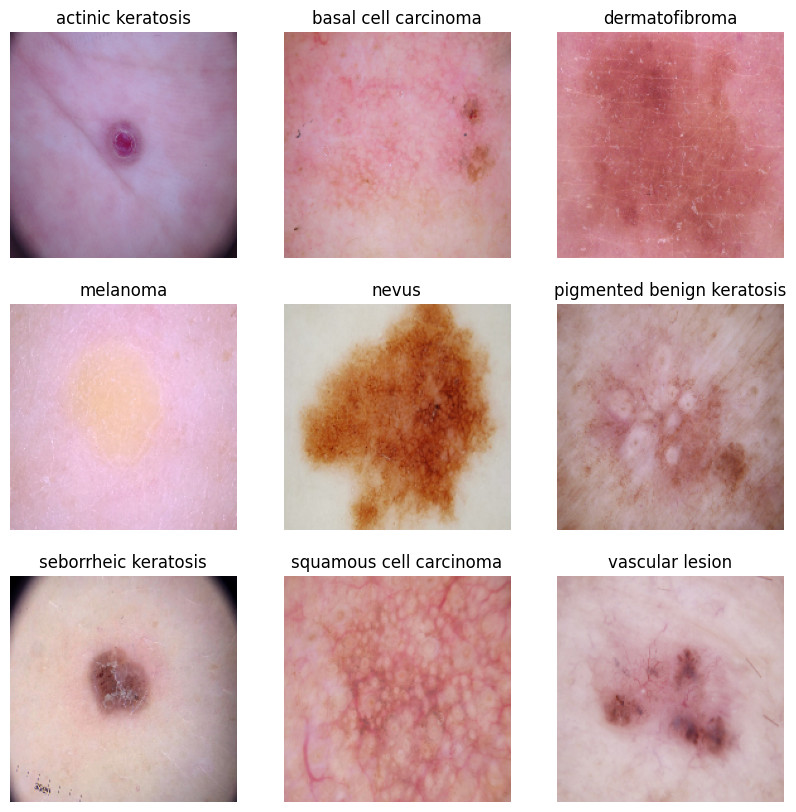

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
preprocessing_layers = [
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3))
]

c:\Users\Subhrajit.Pyne\OneDrive - Wolters Kluwer\Desktop\AI and ML Course Doc\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Creation

**This model is before handling imbalance in train dataset**

### Model1 (Simple One)

In [15]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model_normal = Sequential()
model_normal.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer
#Adding Normalization
model_normal.add(BatchNormalization())
# Here i am adding 3 convoluation layers

#First Convulation layer
model_normal.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_normal.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model_normal.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_normal.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model_normal.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_normal.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model_normal.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model_normal.add(layers.Flatten())

#Dense Layer
model_normal.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model_normal.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model_normal.add(layers.Dense(len(class_names),activation='softmax'))

model_normal.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 180, 180, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,024,405 (30.61 MB)

 Trainable params: 8,024,399 (30.61 MB)

 Non-trainable params: 6 (24.00 B)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [16]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.
model_normal.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Train the model

In [17]:
# Train the model
epochs = 20
history = model_normal.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 284ms/step - accuracy: 0.2646 - loss: 2.2976 - val_accuracy: 0.2260 - val_loss: 2.1136
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 266ms/step - accuracy: 0.4654 - loss: 1.5631 - val_accuracy: 0.1812 - val_loss: 2.0236
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 296ms/step - accuracy: 0.5142 - loss: 1.4087 - val_accuracy: 0.3065 - val_loss: 1.8566
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.5487 - loss: 1.2487 - val_accuracy: 0.3378 - val_loss: 1.8104
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.5639 - loss: 1.2035 - val_accuracy: 0.4251 - val_loss: 1.5407
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 300ms/step - accuracy: 0.6327 - loss: 1.0424 - val_accuracy: 0.4653 - val_loss: 1.4444
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.6563 - loss: 0.9464 - val_accuracy: 0.5302 - val_loss: 1.2980
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.7421 - loss: 0.7522 - val_accu

### Visualizing training results

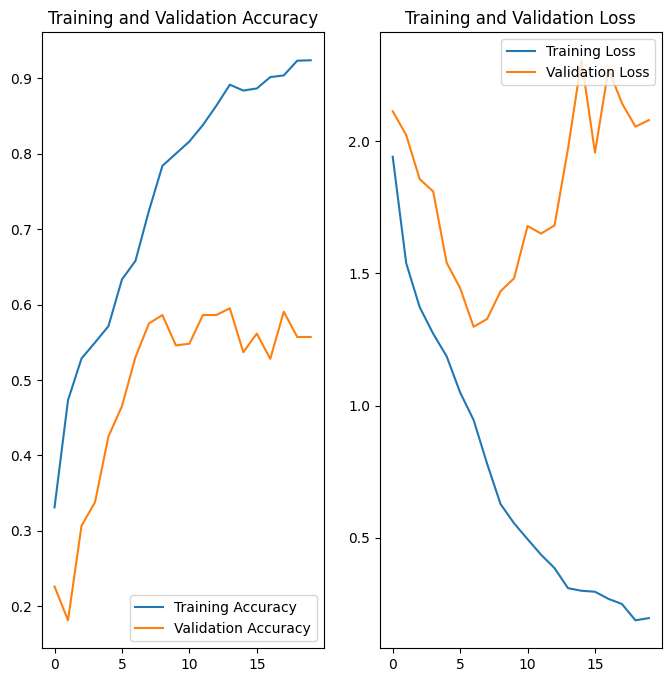

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Check fort Over or Underfit

In [19]:
loss, accuracy = model_normal.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model_normal.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9459 - loss: 0.1209
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5924 - loss: 2.0669
Accuracy:  0.9386160969734192
Validation Accuracy:  0.5570470094680786
Loss:  0.134876549243927
Validation Loss 2.080073356628418


#### Q.Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit

Ans. **From the above we can clearly say, it is overfitting. So we need to add/remove more layers or add regularization or
other tunings to fix it. Also, we can see that our dataset is imbalanced thus we need to augment the images to fix this issue for better result**

### Approarch 2

Adding another layer with ImageGenerator class to augment the image here so that we can get multiple images to train and validate our data. **it is generating augmented images on the fly while your model is still in the training stage.ImageDataGenerator class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images**.

In [20]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        validation_split=0.2)


"""
train_ds_1 = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = class_names,
    batch_size = 64
 )

val_ds_1 = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = class_names,
    batch_size = 64
)
"""


train_generator = datagen.flow_from_directory(
    data_dir_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    data_dir_train, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


In [21]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model_img_generator = Sequential()

#Adding Normalization
model_img_generator.add(BatchNormalization())

model_img_generator.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

# Here i am adding 3 convoluation layers

#First Convulation layer
model_img_generator.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_img_generator.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model_img_generator.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_img_generator.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model_img_generator.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_img_generator.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model_img_generator.add(layers.Dropout(0.5))

#Fourth Convulation Layer
model_img_generator.add(layers.Conv2D(256,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_img_generator.add(layers.MaxPool2D(pool_size=(2,2)))


#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model_img_generator.add(layers.Flatten())

#Dense Layer
model_img_generator.add(layers.Dense(256,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model_img_generator.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales logits into probabilities.
#As we have 9 classes, we are using 9 neurons at dense layer

model_img_generator.add(layers.Dense(len(class_names),activation='softmax'))

model_img_generator.summary()

#As my model was overfitting, thus added 2 more convoluation layer here.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### Compiling the Models

In [22]:

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

optimizer = Adam(learning_rate=0.001)

model_img_generator.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights
#(in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.Also, if there will be any error, we will
#have most recent working one to use.
checkpoint = ModelCheckpoint("model_img_generator.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="auto",
                             verbose=1)


#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=5,
                          mode="auto",
                          verbose=1)

In [23]:
epochs = 20

#The learning rate is reduced by a factor after a specific numbers of epochs. 
# For example, you might start with a learning rate of 0.1 and reduce it by a factor 
# of 0.5 every 10 epochs. This method is simple yet effective, allowing for 
# initial rapid learning that slows down over time.
learning_rate_reduction = ReduceLROnPlateau(monitor="val_accuracy", 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

history = model_img_generator.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=epochs,
                    callbacks=[checkpoint,earlystop,learning_rate_reduction])

c:\Users\Subhrajit.Pyne\OneDrive - Wolters Kluwer\Desktop\AI and ML Course Doc\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.1702 - loss: 2.0877

c:\Users\Subhrajit.Pyne\OneDrive - Wolters Kluwer\Desktop\AI and ML Course Doc\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.22072, saving model to model_img_generator.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 702ms/step - accuracy: 0.1704 - loss: 2.0870 - val_accuracy: 0.2207 - val_loss: 2.0278 - learning_rate: 0.0010
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.2394 - loss: 1.9608
Epoch 2: val_accuracy improved from 0.22072 to 0.23198, saving model to model_img_generator.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 682ms/step - accuracy: 0.2396 - loss: 1.9612 - val_accuracy: 0.2320 - val_loss: 2.0343 - learning_rate: 0.0010
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.2873 - loss: 1.9145
Epoch 3: val_accuracy did not improve from 0.23198
57/57 ━━━━━━━━━━━━━━━━━━━━ 39s 676ms/step - accuracy: 0.2872 - loss: 1.9145 - val_accuracy: 0.2027 - val_loss: 1.9902 - learning_rate: 0.0010
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.2764 - loss: 1.8909
Epoch 4: val_accuracy improved from 0.23198 to 0.34459, saving model to

### Train Data Visualization

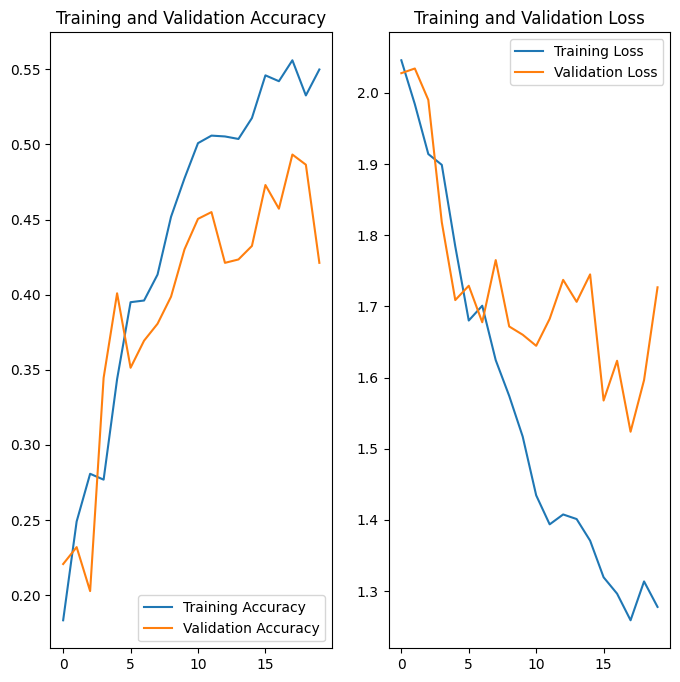

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Accuracy vs Loss

In [25]:
loss, accuracy = model_img_generator.evaluate(train_generator, verbose=1,)
loss_v, accuracy_v = model_img_generator.evaluate(validation_generator, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 321ms/step - accuracy: 0.5722 - loss: 1.2215
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.4506 - loss: 1.7800
Accuracy:  0.5782729983329773
Validation Accuracy:  0.46396395564079285
Loss:  1.2101528644561768
Validation Loss 1.7627326250076294


### Q.Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?Find the distribution of classes in the training dataset.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

**After using ImageDataGenerator, It has improved from previous but accuracy is very low and also overfitting is significant.**

### Data Distribution in Train Datset

In [26]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class'>

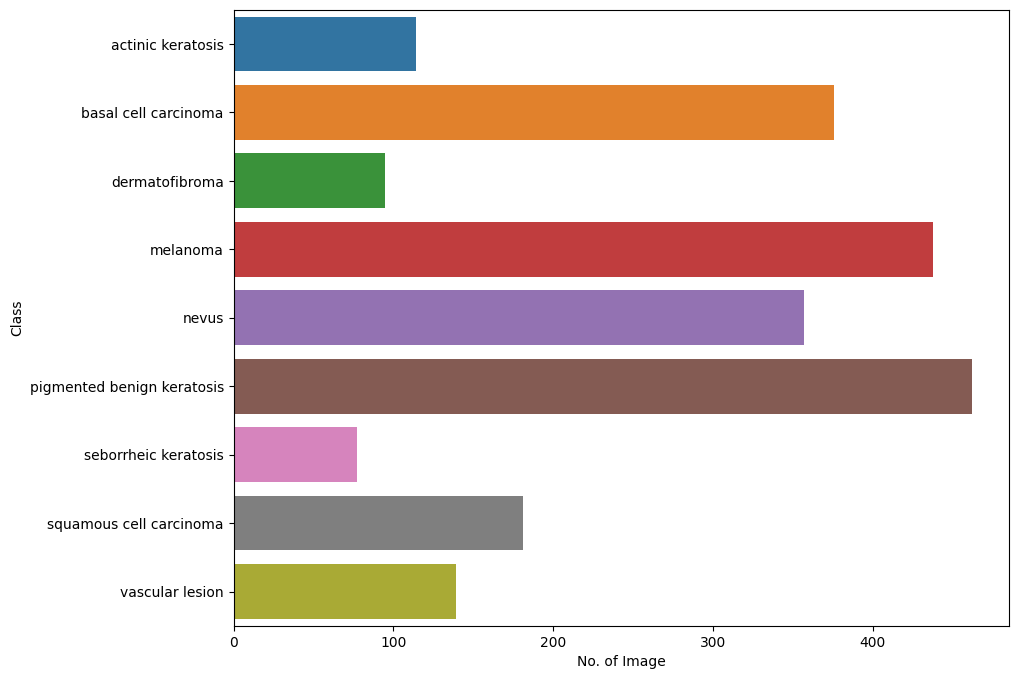

In [27]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class",hue="Class")

#### Q. Which class has the least number of samples? 
- Ans.**Actinic Keratosos(77) has least numbers of samples**

#### Q. Which classes dominate the data in terms proportionate number of samples?
- Ans. **Pigmented benign keratosis** and **melanoma** dominate the data as they are having highest numbers of samples.

### Approach 3

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.

In [28]:
#Using Augmentor to augment image
#path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    print (f"Current Iteration {train_path + i}")
    p = Augmentor.Pipeline(train_path+"/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(2500) ## We are adding 2500 samples per class to make sure that none of the classes are sparse.


Current Iteration ./Skin cancer ISIC The International Skin Imaging Collaboration/Trainactinic keratosis
Initialised with 114 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1DD0E847620>: 100%|██████████| 2500/2500 [00:05<00:00, 463.08 Samples/s] 


Current Iteration ./Skin cancer ISIC The International Skin Imaging Collaboration/Trainbasal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DC85F1C440>: 100%|██████████| 2500/2500 [00:05<00:00, 427.63 Samples/s]                   


Current Iteration ./Skin cancer ISIC The International Skin Imaging Collaboration/Traindermatofibroma
Initialised with 95 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DC86087C50>: 100%|██████████| 2500/2500 [00:05<00:00, 419.39 Samples/s]                   


Current Iteration ./Skin cancer ISIC The International Skin Imaging Collaboration/Trainmelanoma
Initialised with 438 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1DD05827DD0>: 100%|██████████| 2500/2500 [00:29<00:00, 86.14 Samples/s]                    


Current Iteration ./Skin cancer ISIC The International Skin Imaging Collaboration/Trainnevus
Initialised with 357 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DC86124AD0>: 100%|██████████| 2500/2500 [00:22<00:00, 113.32 Samples/s]                    


Current Iteration ./Skin cancer ISIC The International Skin Imaging Collaboration/Trainpigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1DD00BF0800>: 100%|██████████| 2500/2500 [00:06<00:00, 370.96 Samples/s] 


Current Iteration ./Skin cancer ISIC The International Skin Imaging Collaboration/Trainseborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1DD0E668950>: 100%|██████████| 2500/2500 [00:11<00:00, 217.37 Samples/s]                   


Current Iteration ./Skin cancer ISIC The International Skin Imaging Collaboration/Trainsquamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DC8600DF70>: 100%|██████████| 2500/2500 [00:06<00:00, 375.07 Samples/s]                   


Current Iteration ./Skin cancer ISIC The International Skin Imaging Collaboration/Trainvascular lesion
Initialised with 139 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DD00B15250>: 100%|██████████| 2500/2500 [00:07<00:00, 353.64 Samples/s]                   


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

22500


### Visualizing Data

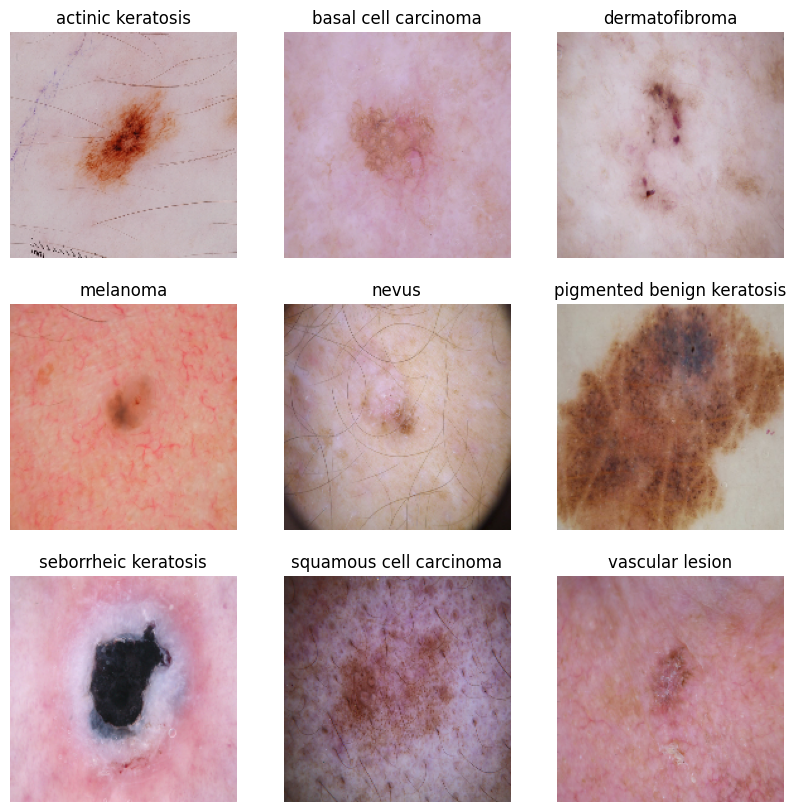

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0c510485-701c-450b-8467-e360e5158ec3.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1fe4833c-2c86-4414-b37e-203dbb9a8acb.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2333fcc9-b913-4e30-b72a-3fa7e4e3c8fe.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_480d0a40-d65e-4f0d-8d7f-f59cfbc8716d.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5ea89c87-b442-40ab-8756-5ea095932c05.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration\\Train

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [33]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
original_df = pd.DataFrame(columns = ['Path','Label'])

new_df = pd.concat ([original_df,df2])


#### After Augmentation, Data Distribution for each Class

In [35]:
new_df['Label'].value_counts()

Label
actinic keratosis             2500
basal cell carcinoma          2500
dermatofibroma                2500
melanoma                      2500
nevus                         2500
pigmented benign keratosis    2500
seborrheic keratosis          2500
squamous cell carcinoma       2500
vascular lesion               2500
Name: count, dtype: int64

So, now we have added 2000 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### : Train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

In [37]:

# data_dir_train = pathlib.Path(path_list_new)


# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   seed=123,
#   validation_split=0.2,
#   subset="training",  # Use "training" to refer to the training data
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

data_dir_train= train_path

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   seed=123,
#   validation_split = 0.2,
#   subset = 'training',
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# train dataset 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                               batch_size=batch_size,
                                                               image_size=(img_height, img_width), 
                                                               label_mode='categorical',
                                                               seed=123,
                                                               subset="training",
                                                               validation_split=0.2)

#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes),
#representing a one-hot encoding of the class index.


Found 24739 files belonging to 9 classes.
Using 19792 files for training.


#### Create a validation dataset

In [38]:
# validation dataset 
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                            batch_size=batch_size,
                                                            image_size=(img_height, img_width), 
                                                            label_mode='categorical',
                                                            seed=123,
                                                            subset="validation",
                                                            validation_split=0.2)

Found 24739 files belonging to 9 classes.
Using 4947 files for validation.


In [39]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(2000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Create your model (make sure to include normalization)

In [40]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model_augmentor = Sequential()

#Adding Normalization
model_augmentor.add(BatchNormalization())

model_augmentor.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

# Here i am adding 3 convoluation layers

#First Convulation layer
model_augmentor.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_augmentor.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model_augmentor.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_augmentor.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model_augmentor.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_augmentor.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model_augmentor.add(layers.Dropout(0.5))

#Fourth Convulation Layer
model_augmentor.add(layers.Conv2D(256,kernel_size=(3,3),activation='relu',padding="Same",kernel_initializer='glorot_uniform'))
model_augmentor.add(layers.MaxPool2D(pool_size=(2,2)))


#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model_augmentor.add(layers.Flatten())

#Dense Layer
model_augmentor.add(layers.Dense(256,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model_augmentor.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales logits into probabilities.
#As we have 9 classes, we are using 9 neurons at dense layer

model_augmentor.add(layers.Dense(len(class_names),activation='softmax'))

model_augmentor.summary()

#As my model was overfitting, thus added 2 more convoluation layer here.

c:\Users\Subhrajit.Pyne\OneDrive - Wolters Kluwer\Desktop\AI and ML Course Doc\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### Compile model

In [41]:

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

optimizer = Adam(learning_rate=0.001)

model_augmentor.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights
#(in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.Also, if there will be any error, we will
#have most recent working one to use.
checkpoint = ModelCheckpoint("model_augmentor.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="auto",
                             verbose=1)


#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=5,
                          mode="auto",
                          verbose=1)

#### Train model

In [42]:
# Train the model
epochs = 30

#The learning rate is reduced by a factor after a specific numbers of epochs. 
# For example, you might start with a learning rate of 0.1 and reduce it by a factor 
# of 0.5 every 10 epochs. This method is simple yet effective, allowing for 
# initial rapid learning that slows down over time.
learning_rate_reduction = ReduceLROnPlateau(monitor="val_accuracy", 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

history = model_augmentor.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=epochs,
                    callbacks=[checkpoint,learning_rate_reduction])

Epoch 1/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.1945 - loss: 2.0496
Epoch 1: val_accuracy improved from -inf to 0.55003, saving model to model_augmentor.keras
619/619 ━━━━━━━━━━━━━━━━━━━━ 199s 305ms/step - accuracy: 0.1947 - loss: 2.0492 - val_accuracy: 0.5500 - val_loss: 1.2236 - learning_rate: 0.0010
Epoch 2/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5736 - loss: 1.1787
Epoch 2: val_accuracy improved from 0.55003 to 0.74227, saving model to model_augmentor.keras
619/619 ━━━━━━━━━━━━━━━━━━━━ 205s 331ms/step - accuracy: 0.5737 - loss: 1.1784 - val_accuracy: 0.7423 - val_loss: 0.7189 - learning_rate: 0.0010
Epoch 3/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7627 - loss: 0.6547
Epoch 3: val_accuracy improved from 0.74227 to 0.83849, saving model to model_augmentor.keras
619/619 ━━━━━━━━━━━━━━━━━━━━ 211s 340ms/step - accuracy: 0.7627 - loss: 0.6547 - val_accuracy: 0.8385 - val_loss: 0.4644 - learning_rate: 0.0010
Epoch 4/30
619/619 ━━━

#### Plotting the Curves

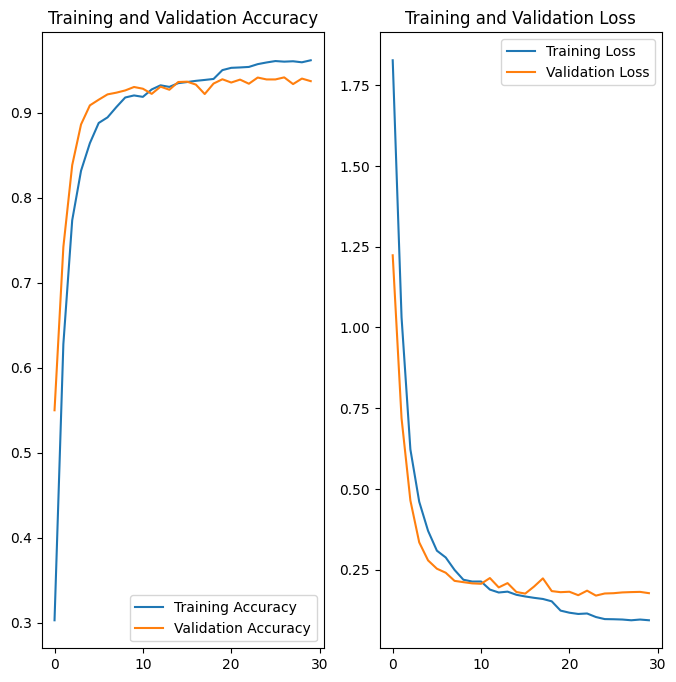

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Check For Overfit and Underfit

In [44]:
loss, accuracy = model_augmentor.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model_augmentor.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

619/619 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.9619 - loss: 0.0870
155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9346 - loss: 0.1831
Accuracy:  0.9627122282981873
Validation Accuracy:  0.937335729598999
Loss:  0.08621317893266678
Validation Loss 0.17738710343837738


**Among the all 3 models we have built and tested, Model3 or model_augmentor has performed best thus we will go with this model to predict on test images as our final model.**

## Model Prediction on Test Data

### Model1

In [75]:
# loss_test, accuracy_test = model_normal.evaluate(test_ds, verbose=1)

# print("Test Accuracy: ",accuracy_test)
# print("Test Loss", loss_test)

### Model2

In [76]:
# loss_test, accuracy_test = model_img_generator.evaluate(test_ds, verbose=1)

# print("Test Accuracy: ",accuracy_test)
# print("Test Loss", loss_test)

### Model3

In [77]:
# loss_test, accuracy_test = model_augmentor.evaluate(test_ds, verbose=1)

# print("Test Accuracy: ",accuracy_test)
# print("Test Loss", loss_test)

### Probability associated with each Image in test along with class

In [ ]:
# Assuming you have a list of class names

# Get the predictions
predictions = model_augmentor.predict(test_ds)

# Prepare data for the DataFrame
data = []

# Iterate over the dataset to get the actual labels and corresponding probabilities
for batch in test_ds:
    images, labels = batch
    for i in range(len(images)):
        predicted_class_index = tf.argmax(predictions[i]).numpy()
        predicted_class_label = test_labels[predicted_class_index]
        probability = tf.nn.softmax(predictions[i])[predicted_class_index].numpy()
        data.append([i,predicted_class_label, probability])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Image Index",'Predicted Class', 'Probability'])

# Save the DataFrame to a CSV file
df.to_csv('predictions_table.csv', index=False)


# Read the CSV file
df = pd.read_csv('predictions_table.csv')

# Display the DataFrame
df

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


,Image Index,Predicted Class,Probability
0,0,basal cell carcinoma,0.199053
1,1,basal cell carcinoma,0.247950
2,2,basal cell carcinoma,0.236897
3,3,melanoma,0.251395
4,4,nevus,0.253374
...,...,...,...
113,17,basal cell carcinoma,0.249897
114,18,nevus,0.250344
115,19,dermatofibroma,0.230350
116,20,pigmented benign keratosis,0.188348


### Testing Predictions on Some Test Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Actual Class pigmented benign keratosis
Predictive Class pigmented benign keratosis


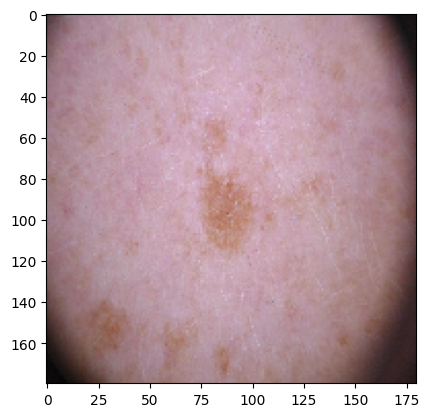

In [48]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[5], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-5],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model_augmentor.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[5] +'\n'+ "Predictive Class "+pred_class )

**This is a correct prediction.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Actual Class nevus
Predictive Class nevus


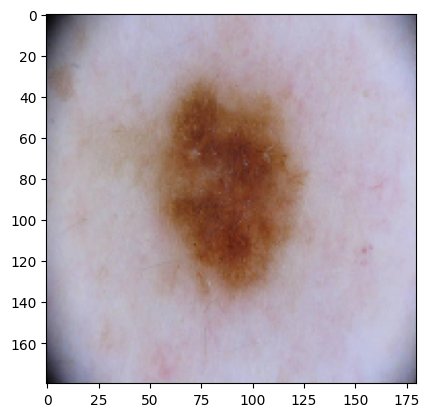

In [49]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[4], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-4],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model_augmentor.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[4] +'\n'+ "Predictive Class "+pred_class )

**This is also a correct prediction.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Actual Class dermatofibroma
Predictive Class dermatofibroma


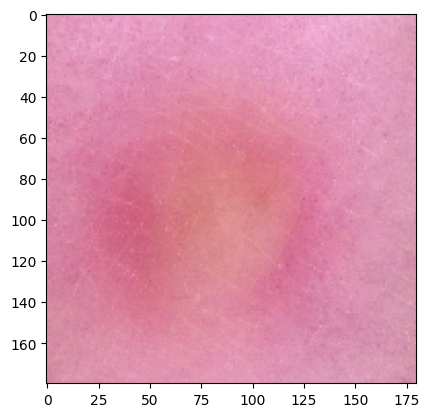

In [50]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[2], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-2],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model_augmentor.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[2] +'\n'+ "Predictive Class "+pred_class )

**Correct Prediction.**

#### Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Ans:- After applying augmentation on train pictures, the result has improved significantly.

- First we have created model in a simple manner wuth 3 convoluation layers and no specific tuning and we got a very high overfitting.

- In the second model, we have used ImageDataGenerator class as to generate augmentation in image with 4 convoluation layer and with other paraneters. It has improved the overfitting but the accuracy is very low.

- Finally, we have used Augmentor module and has generated 2000 aug,ented images for each classes and this time we have built model with 4 convoluation layer. This is the best in accuracy and mitigating overfitting issue as well.
Thus, we can conclude that Augmentor has really helped us to build the best model.